#**Income** **Classification**

In [ ]:
# Importing the Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/adult Income.csv")

In [ ]:
df = pd.DataFrame(data)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.shape

(32561, 15)

In [ ]:
# There are 43957 instances and 15 features out of which income is the target feature

In [ ]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education.num,int64
marital.status,object
occupation,object
relationship,object
race,object
sex,object


**FEATURE** **Engineering**

steps:                                        
1) Missing values                             
2) Outliers                                   
3) Dummy variables                               
4) correlation

In [ ]:
#checking for missing value
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
# replacing the ? with nan values
data = data.replace('?', np.nan, inplace = True)

In [ ]:
df.isna().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
# filling the three categorical features having nan values with mode
df['workclass'].fillna(df['workclass'].mode()[0], inplace = True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace = True)
df['native.country'].fillna(df['native.country'].mode()[0], inplace = True)

<ipython-input-417-8dfbcde40e53>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna(df['workclass'].mode()[0], inplace = True)
<ipython-input-417-8dfbcde40e53>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [ ]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
# All the null values are replaced

**Dropping** **the** **redundant** **features**

In [ ]:
df.head(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K


we can see that education and educational-num give the same info. hence we can drop one of the feature. Preferring to keep the numerical one


In [ ]:
df['native.country'].value_counts()

,count
native.country,
United-States,29753
Mexico,643
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100
Cuba,95


out of 32k instances 29k is United - states so its better to drop this feature column

In [ ]:
df.drop(columns=['education','native.country'], axis = 1, inplace=True)

In [ ]:
# Renaming the feature names
df = df.rename(columns={
    'education.num': 'education_num',
    'capital.gain': 'capital_gain',
    'capital.loss': 'capital_loss',
    'hours.per.week': 'hours_per_week',
    'marital.status': 'marital_status'
})

In [ ]:
df.head(2)

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
0,90,Private,77053,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,<=50K
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,<=50K


**Checking For Outliers**

<Axes: xlabel='age'>

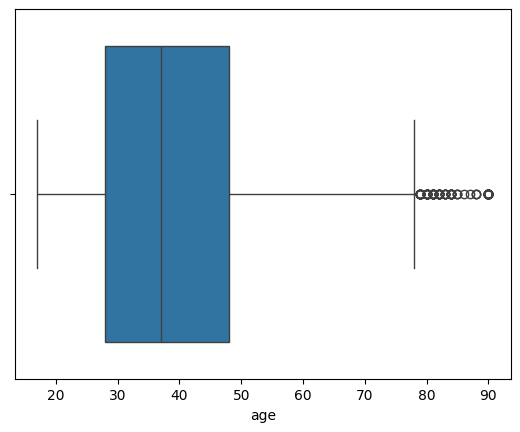

In [ ]:
sns.boxplot(data = df, x = 'age')

In [ ]:
# Function for finding the outliers
def ret_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)

    iqr = (q3 - q1)

    lower = q1 -1.5 * iqr
    upper = q3 + 1.5 * iqr

    lower_outliers = []
    high_outliers =[]

    for i in df:
        if i<lower:
            lower_outliers.append(i)
        elif i>upper:
            high_outliers.append(i)

    return lower_outliers, high_outliers

In [ ]:
age_outliers = ret_outliers(df['age'])

In [ ]:
len(ret_outliers(df['age'])[1])

143

In [ ]:
max(age_outliers[1])

90

In [ ]:
min(age_outliers[1])

79

we have 143 outliers with max value of 90 and min value of 79 in age feature column

We will remove the upper limit outliers i.e. age > 79

In [ ]:
df.drop(df[df['age']>79].index, inplace = True)

<Axes: xlabel='hours_per_week'>

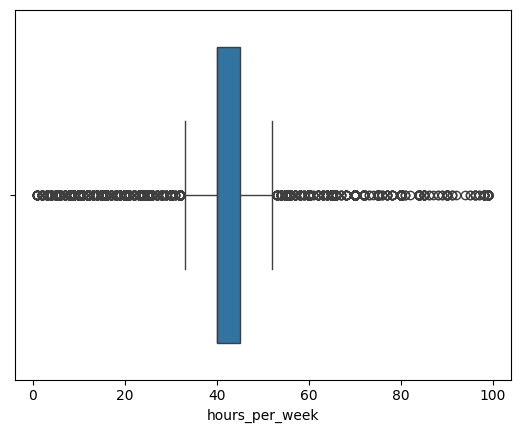

In [ ]:
# Checking outliers for hours_per_week
sns.boxplot(data = df, x = 'hours_per_week')

In [ ]:
hours_outliers = ret_outliers(df['hours_per_week'])

In [ ]:
lower_hours = hours_outliers[0]
len(lower_hours)

5448

In [ ]:
max(lower_hours)

32

In [ ]:
min(lower_hours)

1

In [ ]:
upper_hours = hours_outliers[1]
len(upper_hours)

3483

In [ ]:
max(upper_hours)

99

In [ ]:
min(upper_hours)

53

Since we have seen that for lower range outliers(5448) : min --> 1 and max --> 32


for upper range outliers(3483): min --> 53 and max --> 99

since the number of outliers are greater in number we can't remove them so capping would be the best option here

In [ ]:
# Capping values below the lower bound to the lower bound value
df['hours_per_week'] = df['hours_per_week'].apply(lambda x: max(x, max(lower_hours)))

In [ ]:
# Capping values above the upper bound to the upper bound value
df['hours_per_week'] = df['hours_per_week'].apply(lambda x: min(x, min(upper_hours)))

<Axes: xlabel='capital_gain'>

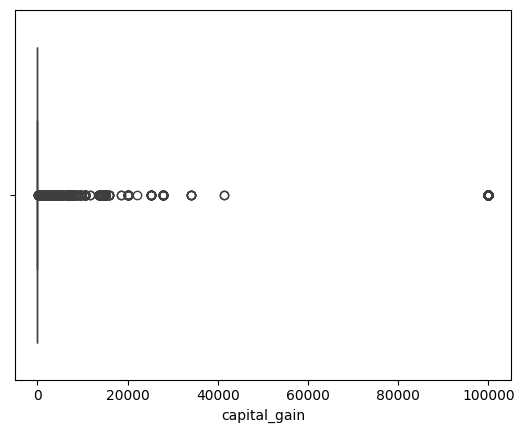

In [ ]:
# checking oultiers for capital_gain
sns.boxplot(data = df, x = 'capital_gain')

In [ ]:
gain_outliers = ret_outliers(df['capital_gain'])
len(gain_outliers[0]),len(gain_outliers[1])

(0, 2697)

In [ ]:
min(gain_outliers[1]),max(gain_outliers[1])

(114, 99999)

Since outliers having such a large range then it not a good choice to remove them. so proceeding by capping them

In [ ]:
df['capital_gain'] = df['capital_gain'].apply(lambda x: min(x, 40000))

<Axes: xlabel='capital_loss'>

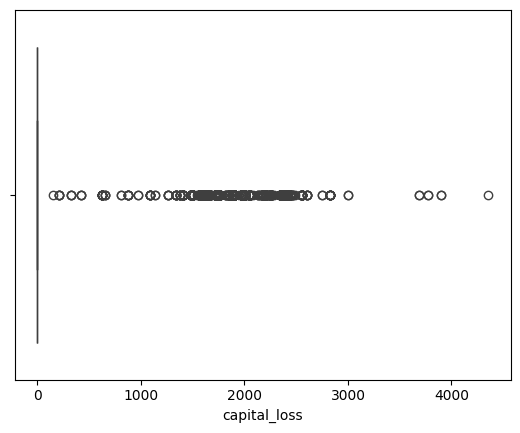

In [ ]:
#Checking outliers for capital_loss
sns.boxplot(data = df, x = 'capital_loss')

In [ ]:
loss_outliers = ret_outliers(df['capital_loss'])
len(loss_outliers[0]),len(loss_outliers[1])

(0, 1512)

In [ ]:
min(loss_outliers[1]),max(loss_outliers[1])

(155, 4356)

In [ ]:
# Capping values for capital_loss
lower_cap = 0
upper_cap = 2500
df['capital_loss'] = df['capital_loss'].apply(lambda x: max(lower_cap, min(x, upper_cap)))

CHECKING FOR CORREALTION

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

<Axes: >

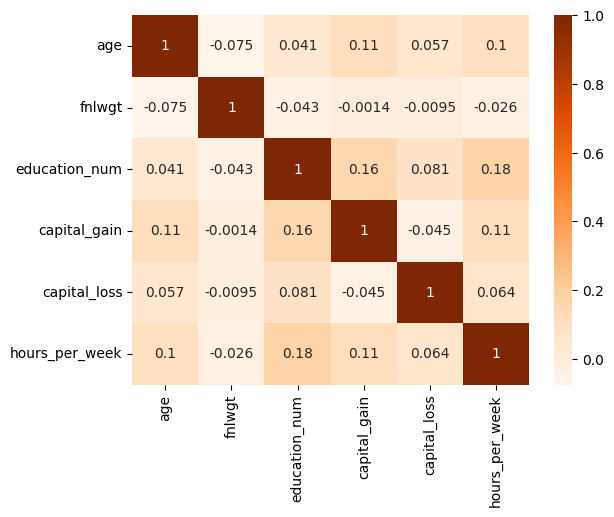

In [ ]:
sns.heatmap(data = numeric_df.corr(), annot = True, cmap = 'Oranges')

In [ ]:
# Dropping the fnlwgt column as it's not showing any significant relation with the target variable
df.drop(columns = ['fnlwgt'], axis = 1, inplace = True)

In [ ]:
df.head(2)

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
2,66,Private,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,2500,40,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,2500,40,<=50K


In [ ]:
df.columns

Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income'],
      dtype='object')

In [ ]:
df.dtypes

,0
age,int64
workclass,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object
capital_gain,int64
capital_loss,int64


In [ ]:
df['income'] = np.where(df['income'] == ">50K", 1, 0)

## Dealing with the categorical values


In [ ]:
cat_values = list(df.select_dtypes(include=['object']).columns)

In [ ]:
cat_values

['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex']

In [ ]:
df = pd.get_dummies(df, columns = cat_values, drop_first=False)

In [ ]:
df.columns

Index(['age', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital_status_Divorced', 'marital_status_Married-AF-spouse',
       'marital_status_Married-civ-spouse',
       'marital_status_Married-spouse-absent', 'marital_status_Never-married',
       'marital_status_Separated', 'marital_status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupatio

In [ ]:
df.shape

(32440, 48)

In [ ]:
# Reseting the index
df = df.reset_index(drop=True)

## Train and Test Split

In [ ]:
# seperating features
x = df.drop(columns=['income'])  # Independent variables
y = df['income']  # Dependent variable

In [ ]:
x.columns

Index(['age', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital_status_Divorced',
       'marital_status_Married-AF-spouse', 'marital_status_Married-civ-spouse',
       'marital_status_Married-spouse-absent', 'marital_status_Never-married',
       'marital_status_Separated', 'marital_status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-movin

In [ ]:
y.head()

,income
0,0
1,0
2,0
3,0
4,0


In [ ]:
# splitting the give data into two for training and testing purpose
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42) #random_state = 42 ,every time you run the code, you get the same split or outcome --> ensure consistency

# Standardization

In [ ]:
x_train.shape, y_train.shape

((24330, 47), (24330,))

In [ ]:
# Standardising the numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train.shape, y_train.shape

((24330, 47), (24330,))

In [ ]:
type(x_train)

numpy.ndarray

## Training different models and comparing their performance




* Logistic Regression
* KNN Classifier
* Random Forest Classifier
* Decision Tree



we will select best parameters for the above algorithms using RandomizedSearchCV

In [ ]:
# Importing the library for RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Importing Library for metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Making a dataframe to store the accuracy data of all the models for easy comparison
result = pd.DataFrame(columns = ['Model', 'Accuracy_Score'])

## 1) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Hyperparameter for logistic Regression

penalty = ['l1','l2', 'elasticnet',None]
C = np.logspace(-4, 4, 50)
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [100, 500, 1000, 2000, 5000]

# putting hyperparameter in the dictionary
lr_hyperparameters = dict(penalty = penalty,
                          C = C,
                          solver = solver,
                          max_iter = max_iter)

lr_random_search = RandomizedSearchCV(estimator = lr,
                                    param_distributions = lr_hyperparameters,
                                    cv = 3,
                                    verbose = 10)

# Fitting the train data in GridSearch
lr_random_search.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START C=0.0013894954943731374, max_iter=100, penalty=elasticnet, solver=lbfgs
[CV 1/3; 1/10] END C=0.0013894954943731374, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3; 1/10] START C=0.0013894954943731374, max_iter=100, penalty=elasticnet, solver=lbfgs
[CV 2/3; 1/10] END C=0.0013894954943731374, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3; 1/10] START C=0.0013894954943731374, max_iter=100, penalty=elasticnet, solver=lbfgs
[CV 3/3; 1/10] END C=0.0013894954943731374, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3; 2/10] START C=1526.4179671752302, max_iter=5000, penalty=elasticnet, solver=sag
[CV 1/3; 2/10] END C=1526.4179671752302, max_iter=5000, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 2/3; 2/10] START C=1526.4179671752302, max_iter=5000, penalty=elasticnet, solver=sa

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3; 6/10] END C=0.009102981779915217, max_iter=2000, penalty=None, solver=sag;, score=0.858 total time=  12.3s
[CV 2/3; 6/10] START C=0.009102981779915217, max_iter=2000, penalty=None, solver=sag


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3; 6/10] END C=0.009102981779915217, max_iter=2000, penalty=None, solver=sag;, score=0.846 total time=   5.6s
[CV 3/3; 6/10] START C=0.009102981779915217, max_iter=2000, penalty=None, solver=sag


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3; 6/10] END C=0.009102981779915217, max_iter=2000, penalty=None, solver=sag;, score=0.849 total time=   3.4s
[CV 1/3; 7/10] START C=0.019306977288832496, max_iter=5000, penalty=l2, solver=lbfgs
[CV 1/3; 7/10] END C=0.019306977288832496, max_iter=5000, penalty=l2, solver=lbfgs;, score=0.857 total time=   0.1s
[CV 2/3; 7/10] START C=0.019306977288832496, max_iter=5000, penalty=l2, solver=lbfgs
[CV 2/3; 7/10] END C=0.019306977288832496, max_iter=5000, penalty=l2, solver=lbfgs;, score=0.845 total time=   0.1s
[CV 3/3; 7/10] START C=0.019306977288832496, max_iter=5000, penalty=l2, solver=lbfgs
[CV 3/3; 7/10] END C=0.019306977288832496, max_iter=5000, penalty=l2, solver=lbfgs;, score=0.849 total time=   0.1s
[CV 1/3; 8/10] START C=3237.45754281764, max_iter=1000, penalty=l1, solver=lbfgs
[CV 1/3; 8/10] END C=3237.45754281764, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3; 8/10] START C=3237.45754281764, max_iter=1000, penalty=l1, solver=lbfgs
[CV 2/3; 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr

RandomizedSearchCV(cv=3, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.963623...
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                                        'max_iter': [100, 500, 1000, 2000,
                                                     5000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   verbose=10)

In [ ]:
# Best parameters for logistic regression
lr_random_search.best_params_

{'solver': 'liblinear',
 'penalty': 'l2',
 'max_iter': 2000,
 'C': 0.3906939937054613}

In [ ]:
# Predict the test results

lr_y_predict = lr_random_search.predict(x_test)

# Model Evaluation ; Confusion Matrix ; Classification report, accuracy score

print("\nConfusion Matrix:\n",confusion_matrix(y_test, lr_y_predict))
print("\n Classification Report:\n",classification_report(y_test, lr_y_predict))
lr_accuracy = accuracy_score(y_test, lr_y_predict)

# Appending the value of accuracy in the df that have created

result.loc[0] = ['Logistic_Regression', lr_accuracy]


Confusion Matrix:
 [[5761  456]
 [ 796 1097]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      6217
           1       0.71      0.58      0.64      1893

    accuracy                           0.85      8110
   macro avg       0.79      0.75      0.77      8110
weighted avg       0.84      0.85      0.84      8110



In [ ]:
result

,Model,Accuracy_Score
0,Logistic_Regression,0.845623


## 2) KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

# Hyperparameters
n_neighbors = list(range(1,20))
metric = ['minkowski']
p=[1,2] # power parameter
algorithm = ['auto']
weights = ['uniform','distance']
leaf_size = list(range(1,20))

# Putting the parameters in the form of dictionary
knn_hyperparameters = dict(n_neighbors=n_neighbors,
                       metric = metric,
                       p=p,
                       algorithm = algorithm,
                       weights = weights,
                       leaf_size = leaf_size)

knn_random_search = RandomizedSearchCV(estimator = knn_clf,
                                    param_distributions = knn_hyperparameters,
                                    cv = 3,
                                    verbose = 10)

knn_random_search.fit(x_train, y_train)
knn_random_search.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START algorithm=auto, leaf_size=16, metric=minkowski, n_neighbors=19, p=1, weights=distance
[CV 1/3; 1/10] END algorithm=auto, leaf_size=16, metric=minkowski, n_neighbors=19, p=1, weights=distance;, score=0.834 total time=   8.2s
[CV 2/3; 1/10] START algorithm=auto, leaf_size=16, metric=minkowski, n_neighbors=19, p=1, weights=distance
[CV 2/3; 1/10] END algorithm=auto, leaf_size=16, metric=minkowski, n_neighbors=19, p=1, weights=distance;, score=0.824 total time=   8.5s
[CV 3/3; 1/10] START algorithm=auto, leaf_size=16, metric=minkowski, n_neighbors=19, p=1, weights=distance
[CV 3/3; 1/10] END algorithm=auto, leaf_size=16, metric=minkowski, n_neighbors=19, p=1, weights=distance;, score=0.831 total time=  11.0s
[CV 1/3; 2/10] START algorithm=auto, leaf_size=17, metric=minkowski, n_neighbors=18, p=2, weights=uniform
[CV 1/3; 2/10] END algorithm=auto, leaf_size=17, metric=minkowski, n_neighbors=18, p=2, weights=un

{'weights': 'uniform',
 'p': 2,
 'n_neighbors': 18,
 'metric': 'minkowski',
 'leaf_size': 17,
 'algorithm': 'auto'}

In [ ]:
# Predict the test results

knn_y_predict = knn_random_search.predict(x_test)

# Model Evaluation ; Confusion Matrix ; Classification report, accuracy score

print("\nConfusion Matrix:\n",confusion_matrix(y_test, knn_y_predict))
print("\n Classification Report:\n",classification_report(y_test, knn_y_predict))
knn_accuracy = accuracy_score(y_test, knn_y_predict)

# Appending the value of accuracy in the df that have created

result.loc[1] = ['KNN_classifier', knn_accuracy]


Confusion Matrix:
 [[5772  445]
 [ 848 1045]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      6217
           1       0.70      0.55      0.62      1893

    accuracy                           0.84      8110
   macro avg       0.79      0.74      0.76      8110
weighted avg       0.83      0.84      0.83      8110



In [ ]:
result

,Model,Accuracy_Score
0,Logistic_Regression,0.845623
1,KNN_classifier,0.840567


Logistic Regression and KNN algo result is almost equal but still Logistic Regression gives better accuracy

### 3) Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

# Hyperparameters

criterion = ['gini', 'entropy']
splitter = ['best', 'random']

min_samples_leaf = [1,2,4]
min_samples_split = [2,5,4]

max_depth = list(range(10,100,10))
max_features = ['auto','sqrt','log2',None]

#putting hypermeters in the form of dictionary

dt_hyperparameters = dict(criterion = criterion,
                          splitter = splitter,
                          min_samples_leaf = min_samples_leaf,
                          min_samples_split = min_samples_split,
                          max_depth = max_depth,
                          max_features = max_features)

dt_random_search = RandomizedSearchCV(estimator = dt_clf,
                                    param_distributions = dt_hyperparameters,
                                    cv = 3,
                                    verbose = 10)

# Fitting the train data in GridSearch
dt_random_search.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best
[CV 1/3; 1/10] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.828 total time=   0.0s
[CV 2/3; 1/10] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best
[CV 2/3; 1/10] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.828 total time=   0.0s
[CV 3/3; 1/10] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best
[CV 3/3; 1/10] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.817 total time=   0.0s
[CV 1/3; 2/10] START criterion=entropy, max_depth=70, max_features=log2, min_s

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_pa

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 4],
                                        'splitter': ['best', 'random']},
                   verbose=10)

In [ ]:
# Best parameters for decision trees
dt_random_search.best_params_

{'splitter': 'best',
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 10,
 'criterion': 'entropy'}

In [ ]:
# Evaluation of the dt_model
# Predict the test results

dt_y_predict = dt_random_search.predict(x_test)

# Model Evaluation ; Confusion Matrix ; Classification report, accuracy score

print("\nConfusion Matrix:\n",confusion_matrix(y_test, dt_y_predict))
print("\n Classification Report:\n",classification_report(y_test, dt_y_predict))
dt_accuracy = accuracy_score(y_test, dt_y_predict)

# Appending the value of accuracy in the df that have created

result.loc[2] = ['Decision_Tree_classifier', dt_accuracy]


Confusion Matrix:
 [[5657  560]
 [ 669 1224]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      6217
           1       0.69      0.65      0.67      1893

    accuracy                           0.85      8110
   macro avg       0.79      0.78      0.78      8110
weighted avg       0.85      0.85      0.85      8110



In [ ]:
result

,Model,Accuracy_Score
0,Logistic_Regression,0.845623
1,KNN_classifier,0.840567
2,Decision_Tree_classifier,0.848459


All the three algo's gives almost equal result but Logistic Regression gives Better one

## 4) Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

# Hyperparameters

criterion = ['gini', 'entropy']
max_depth = list(range(10,100,10))
min_samples_leaf = [1,2,4]
min_samples_split = [2,5,10]
max_features = ['auto','sqrt','log2',None]
bootstrap = [True, False]

# Putting the hyperparameters in the dictionary
rf_hyperparameters = dict(criterion = criterion,
                          max_depth = max_depth,
                          min_samples_leaf = min_samples_leaf,
                          min_samples_split = min_samples_split,
                          max_features = max_features,
                          bootstrap = bootstrap)

rf_random_search = RandomizedSearchCV(estimator = rf_clf,
                                    param_distributions = rf_hyperparameters,
                                   cv = 3,
                                   verbose = 10)

# Fitting the gridsearch of train data

rf_random_search.fit(x_train, y_train)

rf_random_search.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START bootstrap=False, criterion=entropy, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5
[CV 1/3; 1/10] END bootstrap=False, criterion=entropy, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 2/3; 1/10] START bootstrap=False, criterion=entropy, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5
[CV 2/3; 1/10] END bootstrap=False, criterion=entropy, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 3/3; 1/10] START bootstrap=False, criterion=entropy, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5
[CV 3/3; 1/10] END bootstrap=False, criterion=entropy, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 1/3; 2/10] START bootstrap=True, criterion=gini, max_depth=40, max_f

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
12 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

{'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 80,
 'criterion': 'entropy',
 'bootstrap': False}

In [ ]:
# Evaluation of the rf_model
# Predict the test results

rf_y_predict = rf_random_search.predict(x_test)

# Model Evaluation ; Confusion Matrix ; Classification report, accuracy score

print("\nConfusion Matrix:\n",confusion_matrix(y_test, rf_y_predict))
print("\n Classification Report:\n",classification_report(y_test, rf_y_predict))
rf_accuracy = accuracy_score(y_test, rf_y_predict)

# Appending the value of accuracy in the df that have created

result.loc[3] = ['Random_Forest_classifier', rf_accuracy]


Confusion Matrix:
 [[5838  379]
 [ 707 1186]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      6217
           1       0.76      0.63      0.69      1893

    accuracy                           0.87      8110
   macro avg       0.82      0.78      0.80      8110
weighted avg       0.86      0.87      0.86      8110



In [ ]:
result

,Model,Accuracy_Score
0,Logistic_Regression,0.845623
1,KNN_classifier,0.840567
2,Decision_Tree_classifier,0.848459
3,Random_Forest_classifier,0.866091


Random Forest is giving better accuracy then all the algo's previously used

In [ ]:
import pickle

rf_model = rf_random_search.best_estimator_

with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [ ]:
model_columns = [col for col in df.columns.tolist() if col != 'income']

with open('model_columns.pkl', 'wb') as file:
    pickle.dump(model_columns, file)

In [ ]:
print(model_columns)

['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'marital_status_Divorced', 'marital_status_Married-AF-spouse', 'marital_status_Married-civ-spouse', 'marital_status_Married-spouse-absent', 'marital_status_Never-married', 'marital_status_Separated', 'marital_status_Widowed', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_O

In [ ]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [ ]:
np.__version__, pd.__version__, sns.__version__, plt.matplotlib.__version__

('1.26.4', '2.2.2', '0.13.2', '3.8.0')